# Sentiment Analysis on Amazon Reviews

In this notebook we will be doing some sentiment analysis in python using two different techniques:

- VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
- Roberta Pretrained Model from 🤗
- Huggingface Pipeline

### STEP 0 : Read Data and NLTK Basics

In [ ]:
#! pip install [package_name] 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
#natural language tool kit


In [22]:
#Read in data
df= pd.read_csv('./dataset/Reviews.csv')

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
df['Text'].values[0]
#text of reviewer 1

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [25]:
df.shape #shape of the dataset 

(500, 10)

In [24]:
#downsizing the dataset
df= df.head(500)

In [14]:
df.head() #a reference of what columns we have available to us

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Quick EDA

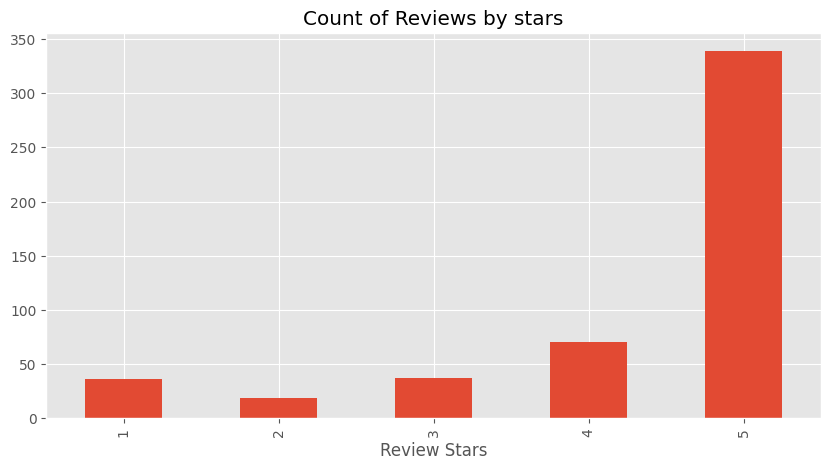

In [26]:
ax= df['Score'].value_counts().sort_index().plot(kind='bar', 
                                             title='Count of Reviews by stars', 
                                             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

most of the reviews are actually 5 stars , so it is very biased towards positive reviews

### Basic NLTK

In [27]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [40]:
import nltk

nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [32]:
tokens = nltk.word_tokenize(example)
tokens[:10]
#here we break the sentence into words, 
#this is more efficient than just regex and space

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [36]:
tagged=nltk.pos_tag(tokens)
#part of speech tags
# use https://spotintelligence.com/2023/01/24/part-of-speech-pos-tagging-in-nlp-python/
# to determine NLTK POS tagger abbreviations
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [41]:
entities=nltk.chunk.ne_chunk(tagged)
#this takes the recommended name entity 
#chunker to chunk the given list of tagged tokens
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)
